In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# create start and end date variables
start = datetime.datetime(2011,3,17)
end = datetime.datetime(2021,3,17)

In [3]:
qqq = web.DataReader('QQQ', 'yahoo', start, end)
splg = web.DataReader('SPLG', 'yahoo', start, end)
dia = web.DataReader('DIA', 'yahoo', start, end)
acwi = web.DataReader('ACWI', 'yahoo', start, end)

In [4]:
qqq

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-03-17,55.240002,54.130001,55.009998,54.650002,94434500.0,49.395752
2011-03-18,55.220001,54.410000,55.220001,54.450001,94887200.0,49.284397
2011-03-21,55.779999,54.500000,55.279999,55.500000,57423000.0,50.234806
2011-03-22,55.610001,55.279999,55.580002,55.400002,36162100.0,50.144291
2011-03-23,55.869999,54.820000,55.200001,55.709999,60365100.0,50.424877
...,...,...,...,...,...,...
2021-03-11,319.859985,314.850006,315.769989,318.040009,53244500.0,318.040009
2021-03-12,318.230011,311.390015,313.859985,315.459991,69276600.0,315.459991
2021-03-15,319.000000,314.100006,315.790009,318.829987,42955700.0,318.829987


In [5]:
# dataframe concatenation
stocks = pd.concat([qqq.Close, splg.Close, dia.Close, acwi.Close], axis=1)

In [6]:
stocks.columns = ['QQQ', 'SPLG', 'DIA', 'ACWI']
stocks

,QQQ,SPLG,DIA,ACWI
Date,,,,
2011-03-17,54.650002,14.885000,117.690002,46.049999
2011-03-18,54.450001,15.005000,118.269997,46.590000
2011-03-21,55.500000,15.217500,120.070000,47.400002
2011-03-22,55.400002,15.192500,119.919998,47.459999
2011-03-23,55.709999,15.240000,120.629997,47.500000
...,...,...,...,...
2021-03-11,318.040009,46.290001,325.329987,95.349998
2021-03-12,315.459991,46.349998,328.309998,95.169998
2021-03-15,318.829987,46.630001,330.089996,95.680000


### Returns

In [7]:
returns = stocks/stocks.shift(1)
returns

,QQQ,SPLG,DIA,ACWI
Date,,,,
2011-03-17,NaN,NaN,NaN,NaN
2011-03-18,0.996340,1.008062,1.004928,1.011726
2011-03-21,1.019284,1.014162,1.015219,1.017386
2011-03-22,0.998198,0.998357,0.998751,1.001266
2011-03-23,1.005596,1.003127,1.005921,1.000843
...,...,...,...,...
2021-03-11,1.023031,1.010478,1.006186,1.012961
2021-03-12,0.991888,1.001296,1.009160,0.998112
2021-03-15,1.010683,1.006041,1.005422,1.005359


### Log Returns

In [8]:
logReturns = np.log(returns)
logReturns

,QQQ,SPLG,DIA,ACWI
Date,,,,
2011-03-17,NaN,NaN,NaN,NaN
2011-03-18,-0.003666,0.008029,0.004916,0.011658
2011-03-21,0.019100,0.014063,0.015105,0.017236
2011-03-22,-0.001803,-0.001644,-0.001250,0.001265
2011-03-23,0.005580,0.003122,0.005903,0.000842
...,...,...,...,...
2021-03-11,0.022770,0.010424,0.006167,0.012878
2021-03-12,-0.008145,0.001295,0.009118,-0.001890
2021-03-15,0.010626,0.006023,0.005407,0.005345


### Sharpe Ratio, Return vs Volatility Chart
Generating (almost) all possible portfolios

In [9]:
no_portfolios = 100
weight = np.zeros((no_portfolios, 4))

expectedReturn = np.zeros(no_portfolios)
expectedVolatility = np.zeros(no_portfolios)
sharpeRatio = np.zeros(no_portfolios)

mean_logRet = logReturns.mean()
sigma = logReturns.cov()

for k in range(no_portfolios):
    # generate random weight vector
    w = np.array(np.random.random(4))
    w = w / np.sum(w)
    weight[k,:] = w
    
    # expected log return
    expectedReturn[k] = np.sum(mean_logRet * w)
    
    # expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    
    # sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]

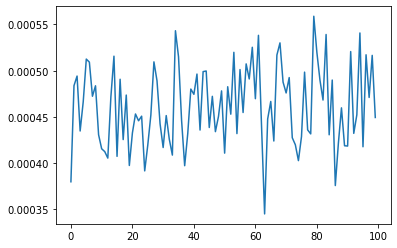

In [10]:
plt.plot(expectedReturn)

In [11]:
max_index = sharpeRatio.argmax()
weight[max_index,:]

array([0.48353298, 0.41248573, 0.00191279, 0.10206849])

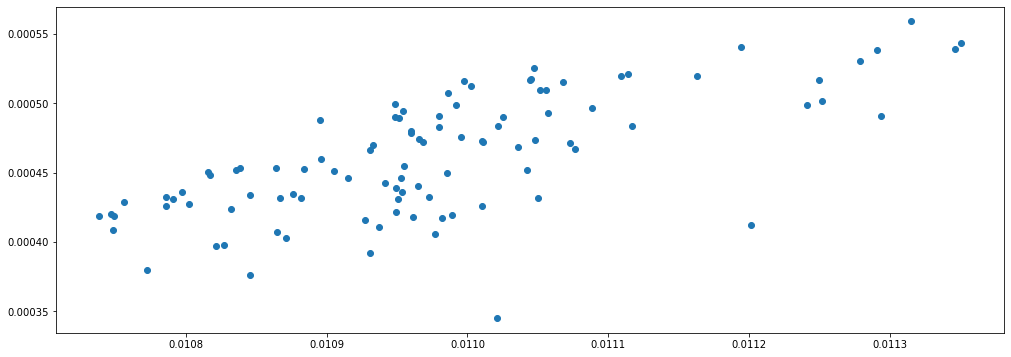

In [15]:
plt.figure(figsize=(17,6))
plt.scatter(expectedVolatility, expectedReturn)
plt.xlabel('Expected Volatility')
plt.ylable('Expected Log Returns')
plt.show()

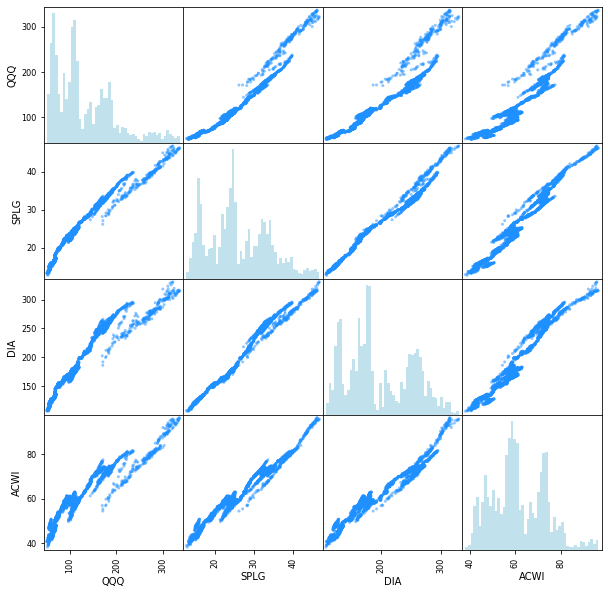

In [16]:
from pandas.plotting import scatter_matrix
# Correlation map of columns
scatter_matrix(stocks, figsize=(10,10), color='dodgerblue', hist_kwds={'color':'lightblue', 'alpha':0.75, 'bins':50})
plt.show()